Key points of an Input Image, Descriptors of an Input Image 3436 3436
Key points of Tram Template, Descriptors of Tram Template 9 9


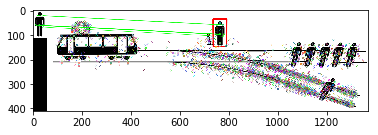

(<matplotlib.image.AxesImage at 0x7fb6c22b1400>, None)

In [4]:
import numpy as np
import cv2
from matplotlib import pyplot as plt 

MIN_MATCH_COUNT = 5

# Read the templates

humanTemplate = cv2.imread('human.jpg')

# Read the main image

inputImage = cv2.imread('Trolley_problem.jpg')

# Create SURF object. You can specify params here or later.

surf = cv2.xfeatures2d.SURF_create()

# Find keypoints and descriptors directly

kp1, des1 = surf.detectAndCompute(inputImage,None)
kp2, des2 = surf.detectAndCompute(humanTemplate,None)

print("Key points of an Input Image, Descriptors of an Input Image", len(kp1), len(des1))
print("Key points of Tram Template, Descriptors of Tram Template", len(kp2), len(des2))

#Detect feature points in both images.

inputImagePoint = cv2.drawKeypoints(inputImage,kp1,None,(255,0,0),4)
humanTemplatePoint = cv2.drawKeypoints(humanTemplate,kp2,None,(255,0,0),4)


cv2.imwrite(r'Input Image Key Point.jpg', inputImagePoint)
cv2.imwrite(r'Human Template Key Point.jpg', humanTemplatePoint)

# Match the features using their descriptors.

bf = cv2.BFMatcher()
matches = bf.knnMatch(des2,des1, k=2)

# Apply ratio test

good = []

for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append(m)
        
if len(good)>MIN_MATCH_COUNT:
    
        src_pts = np.float32([ kp2[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
        dst_pts = np.float32([ kp1[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

        M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
        matchesMask = mask.ravel().tolist()

        h,w, ch = humanTemplate.shape
        pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
        dst = cv2.perspectiveTransform(pts,M)

        img2 = cv2.polylines(inputImage,[np.int32(dst)],True,255,3, cv2.LINE_AA)

else:
        print ("Not enough matches are found - %d/%d" % (len(good),MIN_MATCH_COUNT))
        matchesMask = None

draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                    singlePointColor = None,
                    matchesMask = matchesMask, # draw only inliers
                    flags = 0)

img3 = cv2.drawMatches(humanTemplate,kp2,inputImage,kp1,good,None,**draw_params)

plt.imshow(img3, 'gray'),plt.show()